# LightCT Guide

## Import modules

Under normal running conditions you simply need to call:

In [1]:
import lightct

For the purposes of this guide, I'm going to import a few additional modules to allow for timing and vizulisation...

In [2]:
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline

## Acquire projections (or reload projections)

You then need to define the project folder and the number of projections. The number of projections must be sufficient to cover a 360 degree range. The project folder does not need to exist and will be created on the fly. Running the TomoScan command will start the camera and acquire the projections (storing them in the defined folder):

In [ ]:
scan_folder = os.path.expanduser('~\Documents\lego_dog') # Equivalent to 'C:/Users/username/Documents/test/'
data = lightct.TomoScan(num_proj=200, folder=scan_folder)

In this case, I am going to reload projections from a previous experiment - the following process is nevertheless the same:

In [3]:
folder = os.path.expanduser('~\Dropbox\Python\lightct\lightct\example_scan\projections')
data= lightct.LoadProjections(folder)

Progress: [####################] 100%

## Find number of projections in 360$^\circ%$

The next step is to find the number of projections in 360$^\circ$ - there are three methods by which to do this. The most convenient is the automatic method, which requires you to specify an estimated number of projections in 360$^\circ$. 

This method looks at the deviation between the first image and each subsequent image. A defined minima should be found at the image closest to 360$^\circ$ and each multiple of 360$^\circ$ if multiple rotations were acquired. A smaller minima may well be observed at 180$^\circ$. If an incorrect number of projections is chosen then you can just rerun the calculation with a better estimate.

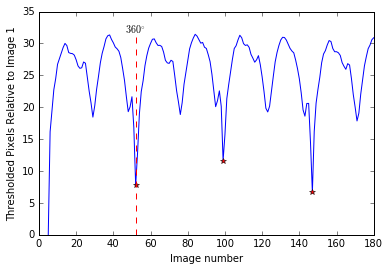


48 images in a 360 rotation. 

 If this is incorrect either rerun with a different value for est_nproj or use the manual method.


In [4]:
est_nproj = 54
data.auto_set_angles(est_nproj) # Gives wrong value

There is also a manual method, which is interactive and a simple set_angles method for instances in which the number of projections is known. The set_angles method also allows a range of 180$^\circ$ to be specified (although this is not recommended):

In [5]:
data.set_angles(48, 360)

## Find (or set) correct centre of rotation

To automatically find the correct centre of rotation, the auto_centre method can be used. This method works by flipping the image closest to 180$^\circ$ and then searching for the position at which the deviation between image_0 and image_180 (flipped) is closest to zero. By default the search window is 400 pixels (+/- 200) although any value can be specified.

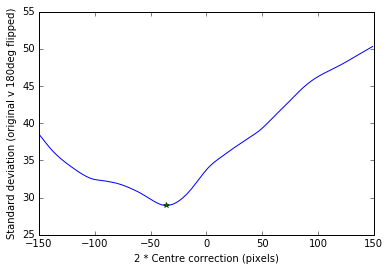

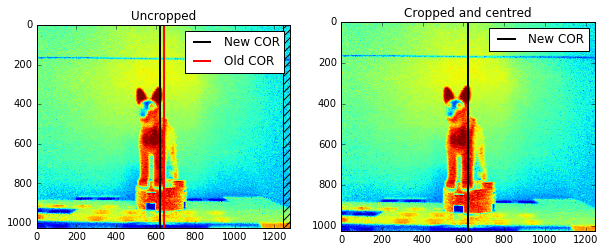

In [9]:
data.auto_centre(window=300)

Once again there is simple method for setting the correct value for instances in which the centre is known:

In [8]:
data.set_centre(-40)

## Set crop

The reconstruction time varies quadratically with projection area, with a doubling in projection area producing a 4 fold increase in reconstruction time:

T(A) = O(A$^2$)

It is therefore advsiable to cut down the projection area as much as possible before reconstructing - this can be achieved through the set_crop method. This returns three projections, corresponding to 3 angles (approx. 0, 60 and 120), which allows the user to ensure they have not cut any of the object.

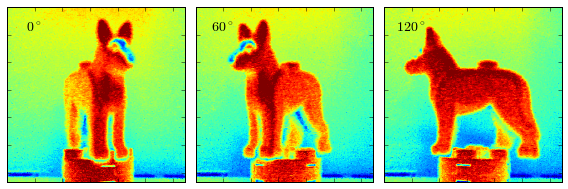

In [11]:
data.set_crop(width=300, top=270, bottom=120)

## Reconstructing data

The reconstruction method applies a downsampling of (4, 4) by default, this is to reduce projection size and ensure the reconstruction occurs in a reasonable time (see above crop info). Data that hasn't been downsampled will typically take hours to run (depending on camera resolution and cropping). There is also an option to apply a median filter to the projections - this may help in situations in which you have noisy data.

The following sections details the impact of the cropping method and downsampling on reconstruction quality and time for reconstruction:

### Uncropped

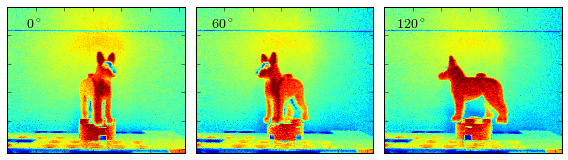

In [19]:
data.set_crop(width=0, top=0, bottom=0)

#### downsample = (4, 4), median_filter = False

In [24]:
t0 = time.time()
data.reconstruct(downsample=(4,4))
t1 = time.time()
recon_slice_U44F = data.recon_data[:, 150, :]

print('\n\nReconstruction time: %0ds' % (t1 - t0))


Reconstructing...
Progress: [####################] 100%

Reconstruction time: 30s


#### downsample = (4, 4), median_filter = True

In [25]:
t0 = time.time()
data.reconstruct(downsample=(4,4), median_filter=True)
t1 = time.time()
recon_slice_U44T = data.recon_data[:, 150, :]

print('\n\nTotal reconstruction time: %0ds' % (t1 - t0))

Applying median filter...
Progress: [####################] 100%
Reconstructing...
Progress: [####################] 100%

Total reconstruction time: 62s


#### Comparison

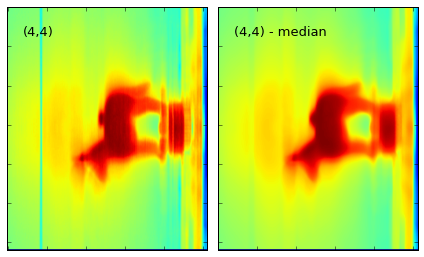

In [63]:
fig, ax_array = plt.subplots(1, 2, figsize=(6, 6))
slices = [recon_slice_U44F, recon_slice_U44T] 
details = [r'(4,4)', r'(4,4) - median']

for ax, recon_slice, info in zip(ax_array.flatten(), 
                                 slices, details):

    ax.imshow(recon_slice)
    ax.text(0.08, 0.88, r'%s' % info, 
            size=13, transform = ax.transAxes)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
fig.tight_layout()

### Cropped

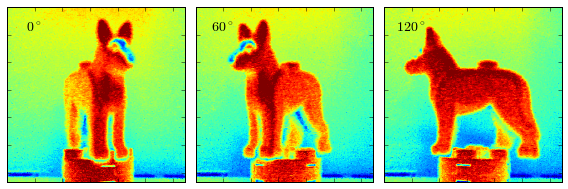

In [31]:
data.set_crop(width=300, top=270, bottom=120)

#### downsample = (4, 4), filter = False

In [33]:
t0 = time.time()
data.reconstruct(downsample=(4,4), median_filter=False)
t1 = time.time()
recon_slice_C44F = data.recon_data[:, 72, :]

print('\n\nTotal reconstruction time: %0ds' % (t1 - t0))


Reconstructing...
Progress: [####################] 100%

Total reconstruction time: 5s


#### downsample = (4, 4), filter = True:

In [36]:
t0 = time.time()
data.reconstruct(downsample=(4,4), median_filter=True)
t1 = time.time()
recon_slice_C44T = data.recon_data[:, 72, :]

print('\n\n Total reconstruction time: %0ds' % (t1 - t0))

Applying median filter...
Progress: [####################] 100%
Reconstructing...
Progress: [####################] 100%

 Total reconstruction time: 13s


#### downsample = (2, 2), filter = False

In [45]:
t0 = time.time()
data.reconstruct(downsample=(2,2), median_filter=False)
t1 = time.time()
recon_slice_C22F = data.recon_data[:, 144, :]

print('\n\n Total reconstruction time: %0ds' % (t1 - t0))


Reconstructing...
Progress: [####################] 100%

 Total reconstruction time: 37s


#### downsample = (2, 2), filter = True

In [43]:
t0 = time.time()
data.reconstruct(downsample=(2,2), median_filter=True)
t1 = time.time()
recon_slice_C22T = data.recon_data[:, 144, :]

print('\n\n Total reconstruction time: %0ds' % (t1 - t0))

Applying median filter...
Progress: [####################] 100%
Reconstructing...
Progress: [####################] 100%

 Total reconstruction time: 69s


#### Comparison

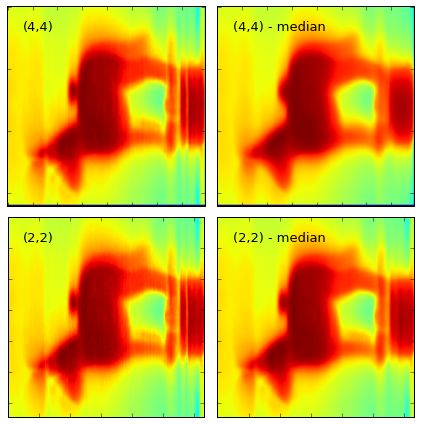

In [58]:
fig, ax_array = plt.subplots(2, 2, figsize=(6, 6))
slices = [recon_slice_C44F, recon_slice_C44T, 
          recon_slice_C22F, recon_slice_C22T]
details = [r'(4,4)', r'(4,4) - median',
           r'(2,2)', r'(2,2) - median']

for ax, recon_slice, info in zip(ax_array.flatten(), 
                                 slices, details):
    ax.imshow(recon_slice)
    ax.text(0.08, 0.88, r'%s' % info, 
            size=13, transform = ax.transAxes)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
fig.tight_layout()